<a href="https://colab.research.google.com/github/hsallrounder/Application-Of-Machine-Learning-In-Industries-Workshop-2023/blob/main/Default_Fin_Application_Of_Machine_Learning_In_Industries_Workshop_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/Default_Fin.csv')

In [3]:
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [5]:
data=data.drop(columns='Index',axis=1)
data.rename(columns = {'Bank Balance':'Bank_Balance', 'Annual Salary' : 'Annual_Salary', 'Defaulted?' : 'Defaulted'}, inplace = True)
data

,Employed,Bank_Balance,Annual_Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [6]:
scaler = preprocessing.MinMaxScaler()
data=scaler.fit_transform(data)
data=pd.DataFrame(data, columns=['Emploted','Bank_Balance','Annual_Salary','Defaulted'])
data

,Emploted,Bank_Balance,Annual_Salary,Defaulted
0,1.0,0.274846,0.598905,0.0
1,0.0,0.307868,0.155727,0.0
2,1.0,0.404454,0.425862,0.0
3,1.0,0.199392,0.479959,0.0
4,1.0,0.295993,0.517867,0.0
...,...,...,...,...
9995,1.0,0.268076,0.717488,0.0
9996,1.0,0.285557,0.259524,0.0
9997,1.0,0.318503,0.795032,0.0
9998,1.0,0.591116,0.493213,0.0


In [7]:
data.loc[data['Bank_Balance'] == 0, 'Bank_Balance'] = data['Bank_Balance'].std()
data

,Emploted,Bank_Balance,Annual_Salary,Defaulted
0,1.0,0.274846,0.598905,0.0
1,0.0,0.307868,0.155727,0.0
2,1.0,0.404454,0.425862,0.0
3,1.0,0.199392,0.479959,0.0
4,1.0,0.295993,0.517867,0.0
...,...,...,...,...
9995,1.0,0.268076,0.717488,0.0
9996,1.0,0.285557,0.259524,0.0
9997,1.0,0.318503,0.795032,0.0
9998,1.0,0.591116,0.493213,0.0


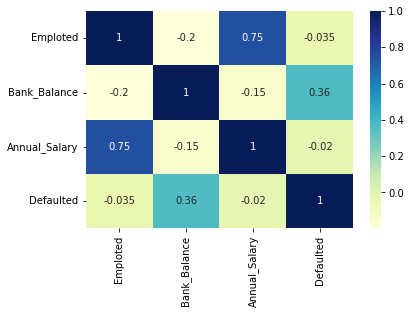

In [8]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [9]:
data.groupby('Defaulted').mean()

,Emploted,Bank_Balance,Annual_Salary
Defaulted,,,
0.0,0.708596,0.312288,0.450580
1.0,0.618619,0.658482,0.430286


In [10]:
data['Defaulted'].mean()

0.0333

In [11]:
X=data.drop(columns='Defaulted',axis=1)
Y=data['Defaulted']

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote_X, smote_Y = smote.fit_resample(X,Y)
smote_Y.value_counts()

0.0    9667
1.0    9667
Name: Defaulted, dtype: int64

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(10000, 3) (8000, 3) (2000, 3)


In [15]:
model=LogisticRegression(max_iter=3000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=3000)

In [16]:
pred=model.predict(X_train)
acc=accuracy_score(pred,Y_train)
print(acc)

0.972125


In [17]:
pred=model.predict(X_test)
acc1=accuracy_score(pred,Y_test)
print(acc1)

0.97
